Logistic Regression : This algorithm is maily used when the dependent variable (output) is in the binary format. discrete/categorical

Some Use Cases of Logistic Regression:
- Weather Prediction (rain or not, cloudy or not) (but with linear regression we can get temperature of certain days)
- Classification Problems : Multiclass classification



Titanic Dataset Prediction :  What factors made people more likely to survive the sinking titanic

1. Collect the data

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

Import Data

In [2]:
titanic_data = pd.read_csv('../datasets/Titanic-Dataset.csv')

In [3]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Columns or Features Description¶¶
- PassengerId: A unique identifier assigned to each passenger.
- Survived: Indicates whether a passenger survived (1) or died (0).
- Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
- Name: The name of the passenger.
- Sex: Represents the gender of the passenger, typically categorized as male or female.
- Age: The age of the passenger, often represented as a numerical value.
- SibSp: Indicates the number of siblings or spouses traveling with the passenger.
- Parch: Represents the number of parents or children traveling with the passenger.
- Ticket: The ticket number associated with the passenger's ticket.
- Fare: The amount of money spent on the ticket.
- Cabin: Represents the cabin category or number assigned to the passenger, if available.
- Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [4]:
print(" No. of Passengers : " +str(len(titanic_data.index)))

 No. of Passengers : 891


2. Analyze the data
- Creating different plots to check relationship between variables

<Axes: xlabel='Survived', ylabel='count'>

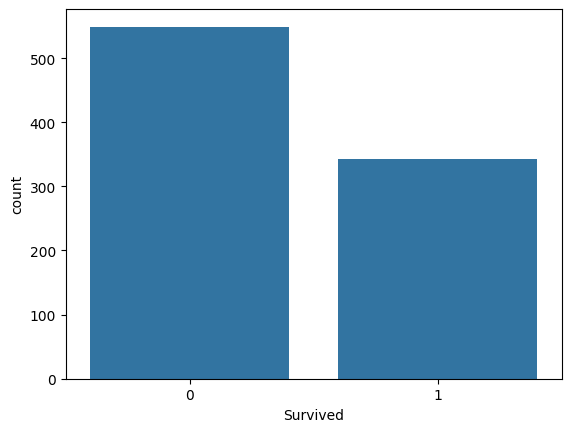

In [5]:
sns.countplot(x='Survived', data=titanic_data)

#1 -> survived
#0 -> did not survived

<Axes: xlabel='Survived', ylabel='count'>

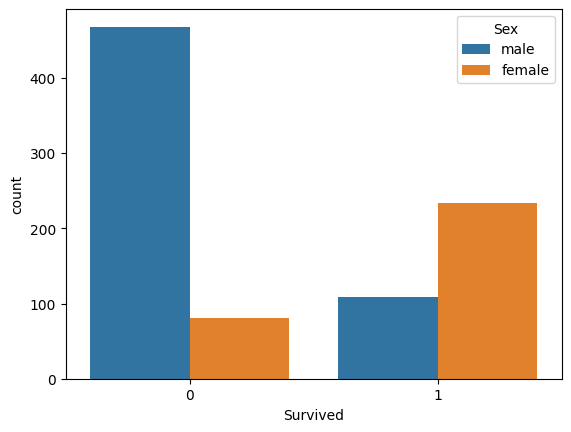

In [6]:
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

# check for how many men or female survived or not

Womens were more lokely to survive than male

<Axes: xlabel='Survived', ylabel='count'>

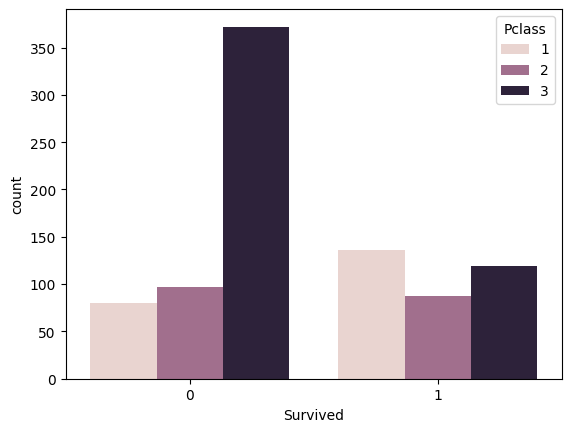

In [7]:
#check for survival rate based on passenger class
sns.countplot(x='Survived', hue='Pclass', data=titanic_data)

The rate of survival for lower class passenger was low.

<Axes: ylabel='Frequency'>

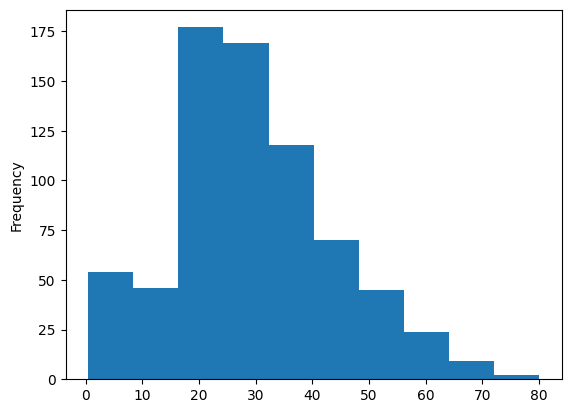

In [8]:
# check for age distibution

titanic_data['Age'].plot.hist()

- People from kids to old age were travelling in titanic
- Major was the young group between 18 to 40

<Axes: ylabel='Frequency'>

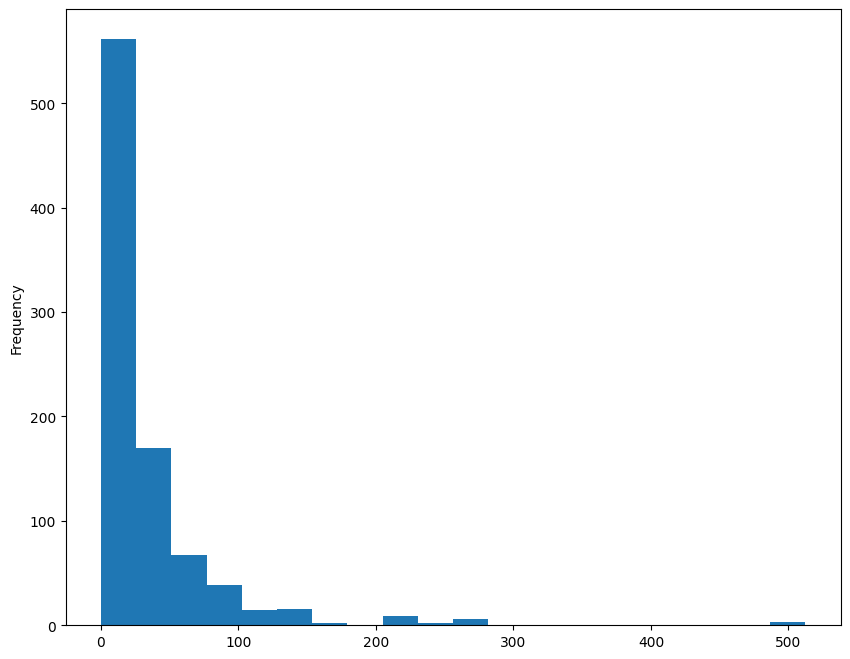

In [9]:
titanic_data['Fare'].plot.hist(bins=20,figsize = (10,8))

In [10]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

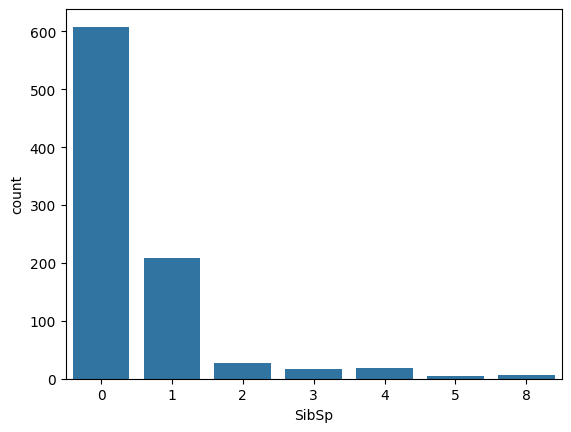

In [11]:
sns.countplot(x='SibSp', data=titanic_data)

Neither a children nor a spouse was onboard with the passenger 

<Axes: xlabel='Parch', ylabel='count'>

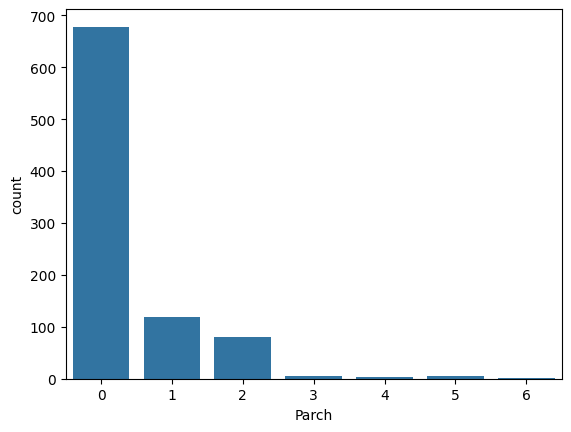

In [12]:
sns.countplot(x='Parch', data=titanic_data)


3. Data Wrangling / Cleaning

In [13]:
# check data has some null values or not, true -> null value
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

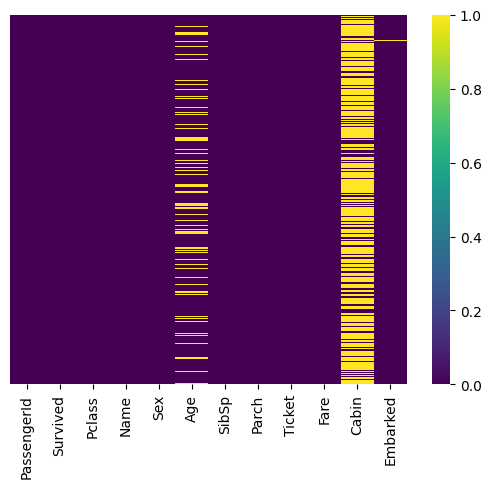

In [15]:
sns.heatmap(titanic_data.isnull(), yticklabels=False, cmap='viridis')

The plot shows missing values in Age nad Cabin column with yelloe color(True)

<Axes: xlabel='Pclass', ylabel='Age'>

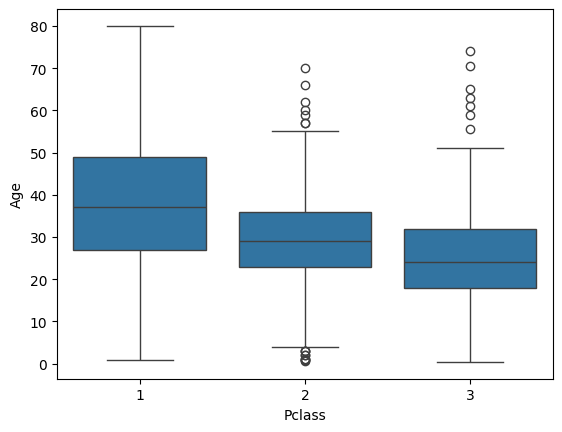

In [16]:
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

Passengers travelling in class 1 and class 2 are tend to be older than those in class 3

Data Imputation

In [17]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The target column will be 'Survived'

In [18]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [19]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
titanic_data.dropna(inplace=True)

<Axes: >

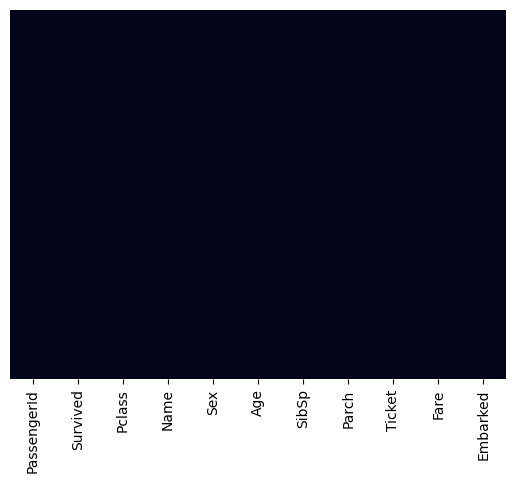

In [21]:
# Lets check if the null values are dropped from data
sns.heatmap(titanic_data.isnull(), yticklabels=False, cbar=False)

In [22]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Other ways of filling null values:
- Calculate the mean and fill the null values with mean

In [23]:
titanic_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


We can see lot of String values, which has to be converted to Categorical values

In [24]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
885,True,False
886,False,True
887,True,False
889,False,True


In [25]:
# Convert boolean values to integers (0 and 1)
pd.get_dummies(titanic_data['Sex']).astype(int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [26]:
pd.get_dummies(titanic_data['Sex'], drop_first=True).astype(int)


,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [27]:
sex = pd.get_dummies(titanic_data['Sex'], drop_first=True).astype(int)
sex.head(3)

,male
0,1
1,0
2,0


In [28]:
# for Embarked
embark = pd.get_dummies(titanic_data['Embarked'], drop_first=True).astype(int)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [29]:
# # Passenger class
# Pclass = pd.get_dummies(titanic_data['Pclass'], drop_first=True).astype(int)
# Pclass.head(5)

In [30]:
# Perform one-hot encoding with drop_first=True
Pclass = pd.get_dummies(titanic_data['Pclass'], prefix='Pclass', drop_first=True).astype(int)

# Rename the columns
Pclass.columns = ['Pclass_2', 'Pclass_3']

# Display the DataFrame
print(Pclass.head(5))


   Pclass_2  Pclass_3
0         0         1
1         0         0
2         0         1
3         0         0
4         0         1


if you have a categorical variable with values 'A', 'B', and 'C', setting drop_first=True will result in two binary columns instead of three. The presence of 'B' being 0 implies 'A' being 1, and the presence of 'C' being 0 implies both 'A' and 'B' being 1.

In [31]:
titanic_data = pd.concat([titanic_data, sex, embark, Pclass], axis=1)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [32]:
# will drop original Pclass, Sex, Embark column

titanic_data.drop(['PassengerId', 'Pclass', 'Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [33]:
titanic_data.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


4. Train and Test

Build the model on train data and predict the output on test data

Train Data

In [34]:
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']

In [35]:
X.shape

(712, 9)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(498, 9) (214, 9) (498,) (214,)


Model

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [41]:
logmodel.fit(X_train, y_train)

/home/db/miniconda3/envs/kml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
pred = logmodel.predict(X_test)

In [43]:
pred

array([1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0])

5. Accuracy check

In [44]:
from sklearn.metrics import classification_report

In [46]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       122
           1       0.81      0.70      0.75        92

    accuracy                           0.80       214
   macro avg       0.80      0.79      0.79       214
weighted avg       0.80      0.80      0.80       214



Precision:

For class 0 (presumably the negative class), precision is 0.79, which means that among all the instances predicted as class 0, 79% were actually of class 0.
For class 1 (presumably the positive class), precision is 0.81, indicating that among all the instances predicted as class 1, 81% were actually of class 1.
Recall:

For class 0, recall is 0.88, meaning that 88% of all instances of class 0 were correctly predicted as class 0.
For class 1, recall is 0.70, indicating that 70% of all instances of class 1 were correctly predicted as class 1.
F1-score:

The F1-score is the harmonic mean of precision and recall. For class 0, it's 0.83, and for class 1, it's 0.75. This metric gives an overall balance between precision and recall.
Support:

Support indicates the number of actual occurrences of each class in the dataset. For class 0, there are 122 instances, and for class 1, there are 92 instances.
Accuracy:

The overall accuracy of the model is 0.80, meaning that 80% of all predictions made by the model are correct.
Macro avg:

The macro average calculates the average of precision, recall, and F1-score across all classes without considering class imbalance. The macro average precision, recall, and F1-score are all around 0.80.
Weighted avg:

The weighted average calculates the average of precision, recall, and F1-score across all classes, considering the class imbalance. The weighted average precision, recall, and F1-score are also around 0.80.

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, pred)

array([[107,  15],
       [ 28,  64]])

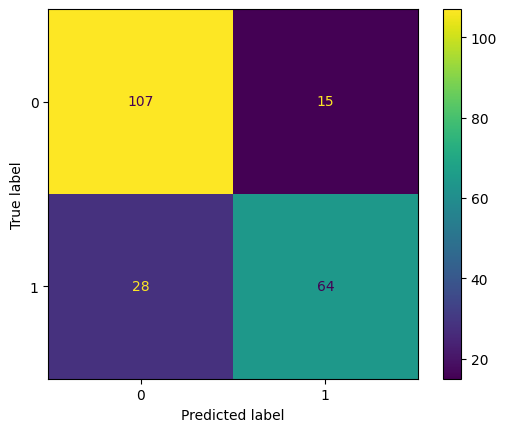

In [54]:
from sklearn.metrics import  ConfusionMatrixDisplay

# Define class labels
classes = ['Died', 'Survived']

cm = confusion_matrix(y_test, pred, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=logmodel.classes_)

disp.plot()
plt.show()

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test, pred)

0.7990654205607477

Lets try out with different algorithms

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

In [64]:
regressors = {
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "XGBoost": xgb.XGBRegressor(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Logistic Regression": LogisticRegression()
}

In [65]:
results = {}

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    results[name] = mse
    print(f"{name} - Mean Squared Error: {mse}")

# Find the best performing regressor
best_regressor = min(results, key=results.get)
print(f"\nBest Regressor: {best_regressor} with Mean Squared Error: {results[best_regressor]}")

Random Forest - Mean Squared Error: 0.17898599887416025
SVR - Mean Squared Error: 0.2580125908958861
XGBoost - Mean Squared Error: 0.20043070380955028
KNN - Mean Squared Error: 0.2514018691588785
Decision Tree - Mean Squared Error: 0.2616822429906542
Linear Regression - Mean Squared Error: 0.20093457943925233

Best Regressor: Random Forest with Mean Squared Error: 0.17898599887416025


/home/db/miniconda3/envs/kml/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The Evaluation Metrics used in Regression task:
1. Mean Absolute Error (MAE): 
- MAE is suitable when you want to know the average magnitude of errors in predictions.
- It gives equal weight to all errors, regardless of their direction (overestimation or underestimation).
- Use MAE when your data contains outliers that could heavily influence the model's performance with MSE.
2. Mean Squared Error (MSE): Average of the squared differences between predicted and actual values.
- MSE is commonly used and suitable when you want to penalize larger errors more heavily than smaller errors.
- Squaring the errors amplifies the impact of larger errors, which can be beneficial if you want to prioritize minimizing these errors.
- However, MSE is sensitive to outliers and may not be appropriate if your data contains extreme values.
3. Root Mean Squared Error (RMSE): Square root of the MSE, providing an interpretable measure in the same units as the target variable.
- It gives more weight to large errors than MAE but less than MSE.
- RMSE is commonly used when you want to express the average error in the same units as the target variable.
4. R-squared (R2): 
- R-squared represents the proportion of the variance in the target variable that is predictable from the features.
- It measures the goodness-of-fit of the model and indicates how well the model explains the variability in the data.
- R2 is useful for comparing different models or assessing the overall performance of a model.
